<a href="https://colab.research.google.com/github/bvanitsthian/cfpb_text_classification-el_chapo/blob/bua_branch/complaints_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
complaints = pd.read_csv('/content/drive/MyDrive/Classification of Consumer Complaints/complaints.csv', index_col = None)

In [7]:
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [8]:
complaints['Issue'].unique()

array(['Incorrect information on your report', 'Fraud or scam',
       'Attempts to collect debt not owed', 'Communication tactics',
       'Struggling to pay mortgage'], dtype=object)

In [ ]:
complaints[complaints['Issue'] == 'Fraud or scam']['Consumer complaint narrative'].unique()

In [23]:
complaints['Issue_Code'] = complaints['Issue'].astype('category').cat.codes

#**Text Preprocessing**

In [10]:
# Replace various combinations of 'XX' with a space 
complaints['Consumer complaint narrative'] = complaints['Consumer complaint narrative'].str.replace(r'\bX+[\sX]*\b', ' ', regex=True)

In [11]:
complaints['Consumer complaint narrative'] = complaints['Consumer complaint narrative'].str.lower()

In [12]:
complaints['Consumer complaint narrative']

0         my name is  this complaint is not made in erro...
1         i searched on  for  and was pointed to a websi...
2         i have a particular account that is stating th...
3         i have not supplied proof under the doctrine o...
4         hello i'm writing regarding account on my cred...
                                ...                        
353427           collections account i have no knowledge of
353428    dear cfpb team, the reason for my complaint is...
353429    frca violations : failing to follow debt dispu...
353430    my father, a  acquired an hecm reverse mortgag...
353431    i have tried to contact cash app about a fraud...
Name: Consumer complaint narrative, Length: 353432, dtype: object

###**Text Tokenization [https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4#31ad](https://)**

In [ ]:
# takes too long to run # complaints["Consumer complaint narrative"] = complaints["Consumer complaint narrative"].apply(word_tokenize)

In [13]:
tokenizer = RegexpTokenizer(r'\w+') #\w+ matches one or more word characters
complaints['Consumer complaint narrative'] = complaints['Consumer complaint narrative'].apply(tokenizer.tokenize)

In [14]:
stop_words = set(stopwords.words('english')) #create english stopwords
complaints['Consumer complaint narrative'] = complaints['Consumer complaint narrative'] \
          .apply(lambda text: [word for word in text if word.lower() not in stop_words]) #remove the stop words from each list of tokens in the column

In [20]:
# remove non alphabetic characters and whitespace
complaints['Consumer complaint narrative'] = complaints['Consumer complaint narrative'] \
            .apply(lambda words: [word for word in words if word.isalpha()])

In [21]:
complaints['Consumer complaint narrative']

0         [name, complaint, made, error, neither, made, ...
1         [searched, pointed, website, legitimately, bel...
2         [particular, account, stating, owe, listed, cr...
3         [supplied, proof, doctrine, estoppel, silence,...
4         [hello, writing, regarding, account, credit, r...
                                ...                        
353427                    [collections, account, knowledge]
353428    [dear, cfpb, team, reason, complaint, tried, r...
353429    [frca, violations, failing, follow, debt, disp...
353430    [father, acquired, hecm, reverse, mortgage, pr...
353431    [tried, contact, cash, app, fraudulent, paymen...
Name: Consumer complaint narrative, Length: 353432, dtype: object

In [24]:
complaints.head()

,Consumer complaint narrative,Issue,Issue_Code
0,name complaint made error neither made third p...,Incorrect information on your report,3
1,search point websit legitim believ websit wher...,Fraud or scam,2
2,particular account state owe list credit repor...,Incorrect information on your report,3
3,suppli proof doctrin estoppel silenc engelhard...,Attempts to collect debt not owed,0
4,hello write regard account credit report belon...,Incorrect information on your report,3


In [22]:
stemmer = SnowballStemmer('english') #reduce words to their root 

complaints['Consumer complaint narrative'] = complaints['Consumer complaint narrative'] \
            .apply(lambda words: ' '.join([stemmer.stem(word) for word in words]))

In [27]:
# save preprocessed data 
complaints.to_csv('/content/drive/MyDrive/Classification of Consumer Complaints/complaints_preprocessed.csv', index=False)

In [5]:
complaints_p = pd.read_csv('/content/drive/MyDrive/Classification of Consumer Complaints/complaints_preprocessed.csv')

#**Word Cloud**

In [ ]:
pip install wordcloud

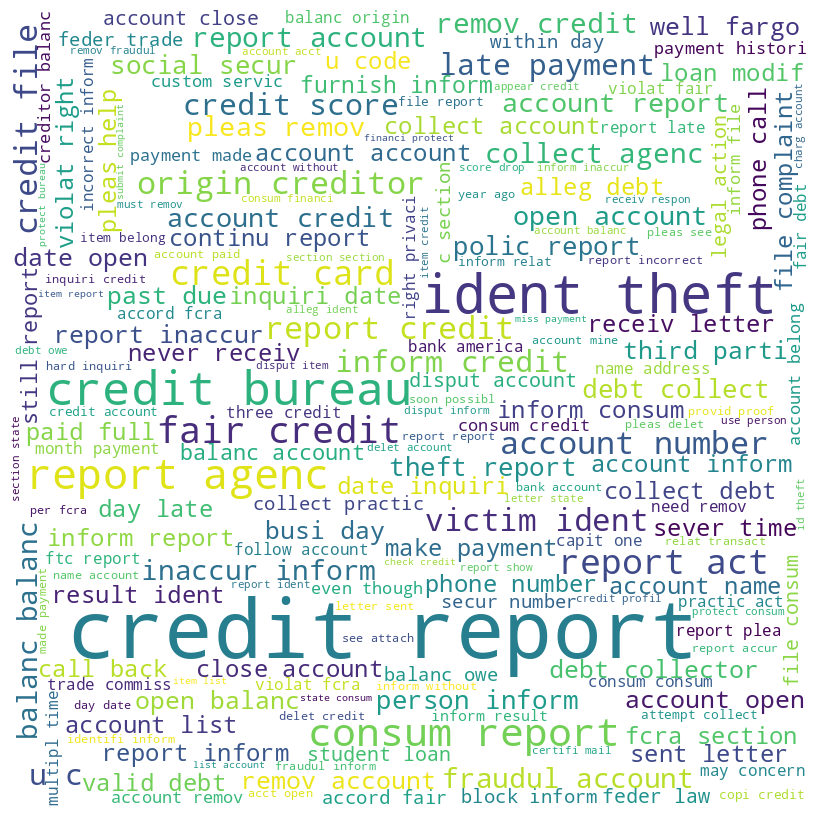

In [8]:
# wordcloud for all issue type
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(complaints_p['Consumer complaint narrative'].astype(str))
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

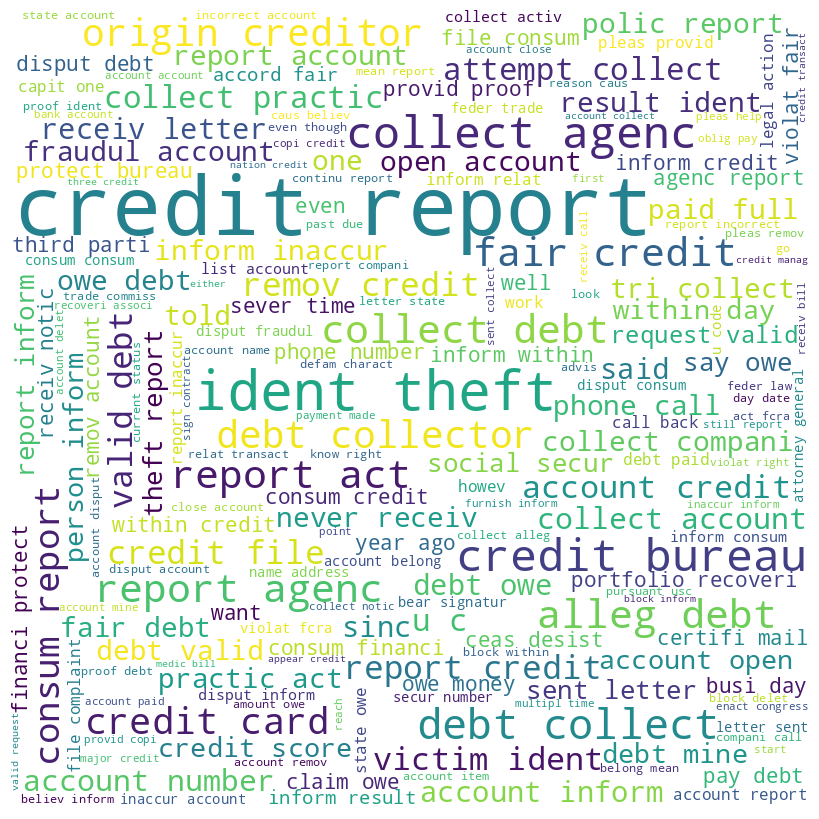

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(complaints[complaints['Issue_Code'] == 0]['Consumer complaint narrative'].astype(str))

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

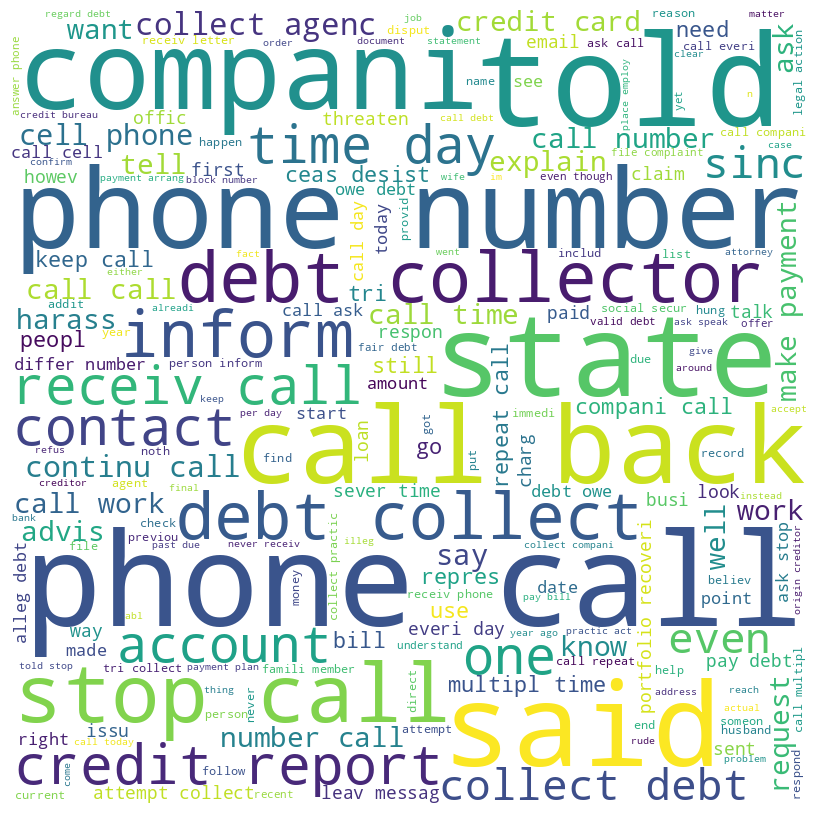

In [9]:
text = ' '.join(complaints_p[complaints_p['Issue_Code'] == 1]['Consumer complaint narrative'].astype(str))

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

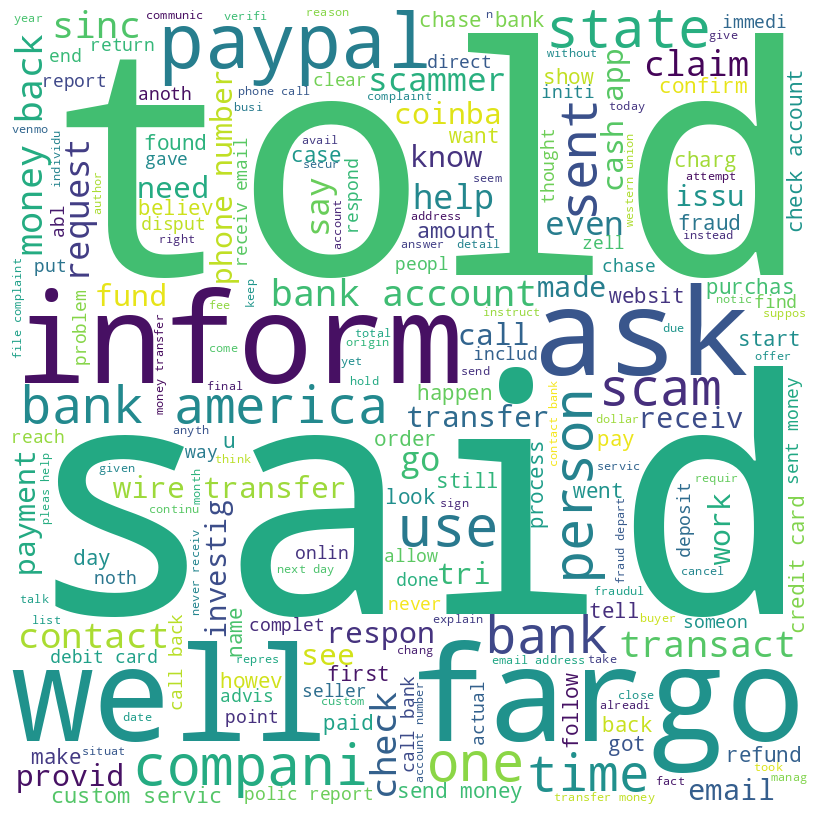

In [10]:
text = ' '.join(complaints_p[complaints_p['Issue_Code'] == 2]['Consumer complaint narrative'].astype(str))

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

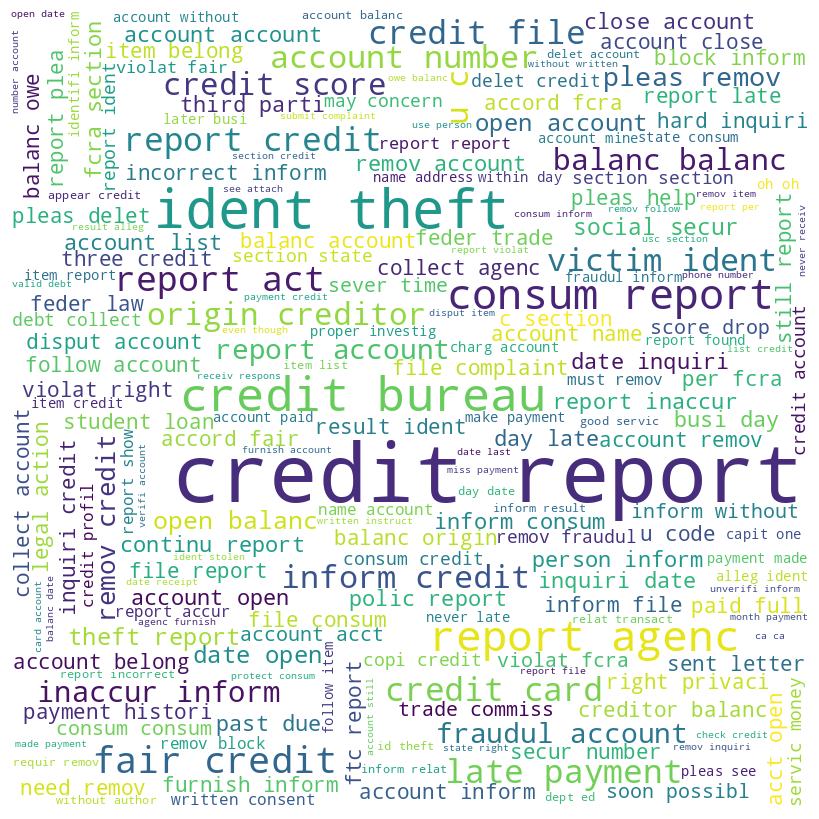

In [11]:
text = ' '.join(complaints_p[complaints_p['Issue_Code'] == 3]['Consumer complaint narrative'].astype(str))

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

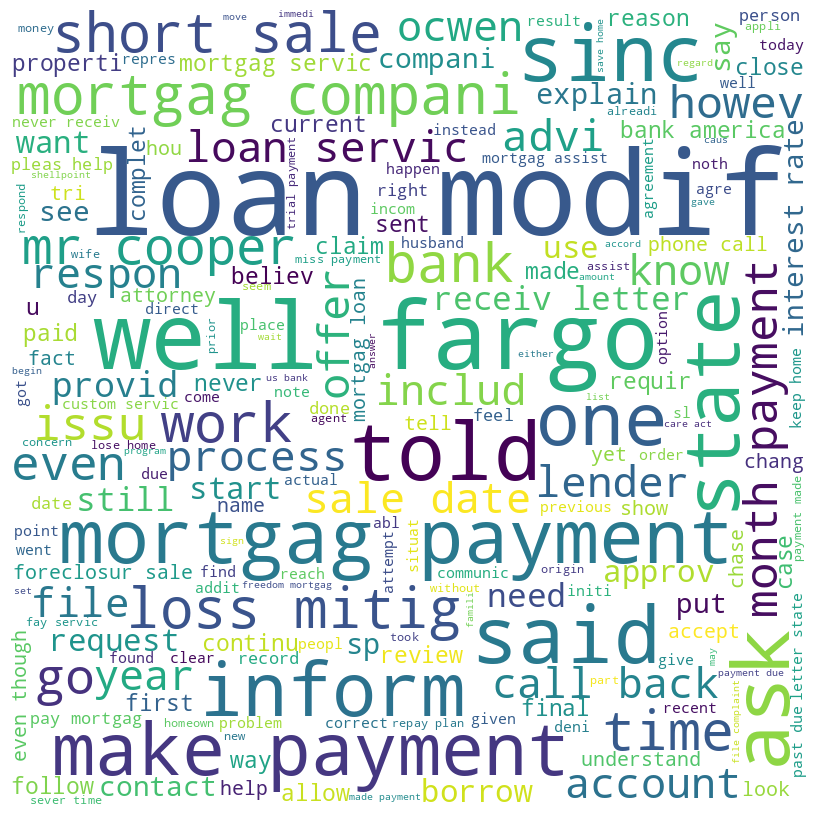

In [12]:
text = ' '.join(complaints_p[complaints_p['Issue_Code'] == 4]['Consumer complaint narrative'].astype(str))

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [18]:
complaints_p.groupby('Issue_Code')['Issue'].unique()

Issue_Code
0       [Attempts to collect debt not owed]
1                   [Communication tactics]
2                           [Fraud or scam]
3    [Incorrect information on your report]
4              [Struggling to pay mortgage]
Name: Issue, dtype: object

#**CNN Model**

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
tokenized_narratives = [x.split() if isinstance(x, str) else [] for x in complaints_p['Consumer complaint narrative'].tolist()]
labels = complaints_p['Issue_Code'].tolist()

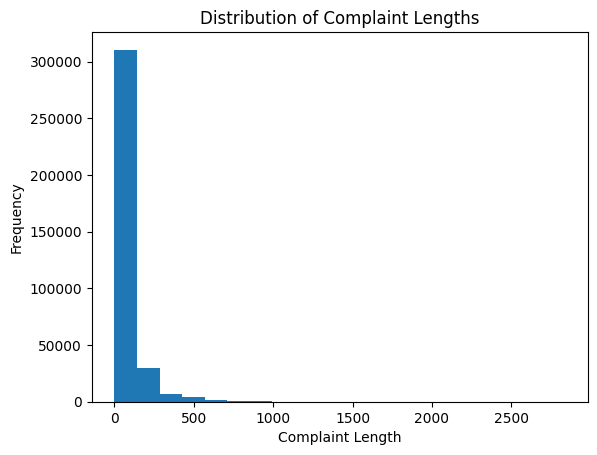

In [11]:
import matplotlib.pyplot as plt

# Calculate the lengths of the complaint narratives
complaint_lengths = [len(sentence) for sentence in tokenized_narratives]

# Create a histogram
plt.hist(complaint_lengths, bins=20)
plt.xlabel('Complaint Length')
plt.ylabel('Frequency')
plt.title('Distribution of Complaint Lengths')
plt.show()


In [12]:
class_counts = pd.Series(labels).value_counts()
class_counts

3    229305
0     73163
1     21243
4     17374
2     12347
dtype: int64

In [13]:
tokens = sorted(set([x for sentence in tokenized_narratives for x in sentence]))
token_index = {word: i + 1 for i, word in enumerate(tokens)}
index_token = {i + 1: word for i, word in enumerate(tokens)}

In [14]:
X = [[token_index[word] for word in sentence] for sentence in tokenized_narratives]
X = pad_sequences(X, maxlen=100)
y = np.array(labels)

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=321, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=321, stratify=y_train_val)

In [16]:
vocab_size = len(token_index) + 1
num_classes = len(set(labels))

cnn_model = tf.keras.models.Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=128, mask_zero=True, input_length=100))
cnn_model.add(Conv1D(filters=32, kernel_size=3))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))  # Use num_classes for multi-class classification

cnn_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [17]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          6826112   
                                                                 
 conv1d (Conv1D)             (None, 98, 32)            12320     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 6,839,653
Trainable params: 6,839,653
Non-trainable params: 0
______________________________________________

In [18]:
history = cnn_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100, callbacks=[callback])

y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

confusion_matrix(y_test, y_pred)

Epoch 1/100
6213/6213 [==============================] - 77s 11ms/step - loss: 0.3971 - accuracy: 0.8529 - val_loss: 0.3491 - val_accuracy: 0.8709
Epoch 2/100
6213/6213 [==============================] - 28s 4ms/step - loss: 0.3303 - accuracy: 0.8792 - val_loss: 0.3391 - val_accuracy: 0.8762
Epoch 3/100
6213/6213 [==============================] - 26s 4ms/step - loss: 0.3125 - accuracy: 0.8864 - val_loss: 0.3443 - val_accuracy: 0.8749
Epoch 4/100
6213/6213 [==============================] - 25s 4ms/step - loss: 0.2997 - accuracy: 0.8919 - val_loss: 0.3367 - val_accuracy: 0.8780
Epoch 5/100
6213/6213 [==============================] - 24s 4ms/step - loss: 0.2918 - accuracy: 0.8954 - val_loss: 0.3557 - val_accuracy: 0.8747
Epoch 6/100
6213/6213 [==============================] - 24s 4ms/step - loss: 0.2869 - accuracy: 0.8986 - val_loss: 0.3717 - val_accuracy: 0.8715
Epoch 7/100
2762/2762 [==============================] - 4s 1ms/step


array([[12667,   730,   133,  4610,   151],
       [ 1116,  3874,    38,   229,    54],
       [  181,    38,  2606,   222,    40],
       [ 2589,   167,   118, 54167,   285],
       [   80,    62,    35,   239,  3927]])

In [21]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.76      0.69      0.73     18291\n           1       0.80      0.73      0.76      5311\n           2       0.89      0.84      0.87      3087\n           3       0.91      0.94      0.93     57326\n           4       0.88      0.90      0.89      4343\n\n    accuracy                           0.87     88358\n   macro avg       0.85      0.82      0.83     88358\nweighted avg       0.87      0.87      0.87     88358\n'

#**CNN Model Weighted Class**

In [22]:
class_counts = pd.Series(labels).value_counts()
total_samples = len(labels)
class_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}

y = np.array(labels)

In [23]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=321, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=321, stratify=y_train_val)

In [24]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=128, mask_zero=True, input_length=100))
cnn_model.add(Conv1D(filters=32, kernel_size=3))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [25]:
history = cnn_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        callbacks=[callback],
                        class_weight=class_weights)

Epoch 1/100
6213/6213 [==============================] - 58s 9ms/step - loss: 2.3992 - accuracy: 0.8104 - val_loss: 0.4626 - val_accuracy: 0.8343
Epoch 2/100
6213/6213 [==============================] - 28s 5ms/step - loss: 2.0650 - accuracy: 0.8307 - val_loss: 0.4753 - val_accuracy: 0.8254
Epoch 3/100
6213/6213 [==============================] - 26s 4ms/step - loss: 2.0901 - accuracy: 0.8282 - val_loss: 0.4649 - val_accuracy: 0.8315
Epoch 4/100
6213/6213 [==============================] - 26s 4ms/step - loss: 2.1510 - accuracy: 0.8253 - val_loss: 0.4699 - val_accuracy: 0.8308


In [26]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)
confusion_matrix(y_test, y_pred)

2762/2762 [==============================] - 4s 1ms/step


array([[13699,  1360,   505,  2336,   391],
       [  702,  4277,   113,    84,   135],
       [  107,    44,  2779,   113,    44],
       [ 6167,   441,  1117, 48593,  1008],
       [   42,    39,    75,    88,  4099]])

In [27]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.66      0.75      0.70     18291\n           1       0.69      0.81      0.75      5311\n           2       0.61      0.90      0.72      3087\n           3       0.95      0.85      0.90     57326\n           4       0.72      0.94      0.82      4343\n\n    accuracy                           0.83     88358\n   macro avg       0.73      0.85      0.78     88358\nweighted avg       0.85      0.83      0.84     88358\n'

#**Pretrained Model**

In [ ]:
!pip install -q --upgrade keras-nlp tensorflow

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras_nlp
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
complaints = pd.read_csv('/content/drive/MyDrive/Classification of Consumer Complaints/complaints.csv', index_col = None)

In [14]:
complaints.head()

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report


In [15]:
X = complaints['Consumer complaint narrative']
y = complaints['Issue']

In [16]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=321, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=321, stratify=y_train_val)

In [17]:
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [ ]:
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_tiny_en_uncased_sst2",
    num_classes=2,
)

In [20]:
classifier.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1,
)

6213/6213 [==============================] - 2154s 343ms/step - loss: nan - sparse_categorical_accuracy: 0.0601 - val_loss: nan - val_sparse_categorical_accuracy: 0.0601


In [ ]:
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred)